<a href="https://colab.research.google.com/github/Beenhachi/HeartDisease/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COLLECTING DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import sys
import sklearn
import matplotlib
import keras
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

2021-07-12 19:24:05.720931: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


**EXPLANATORY DATA ANALYSIS**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/KBSProject/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# printing the last twenty-five data points to get a clearer understanding of our data
df.loc[1000:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1000,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0
1001,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
1002,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0
1003,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
1004,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
1005,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
1006,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
1007,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
1008,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
1009,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0


**CLEANING DATA**

In [ ]:
# remove missing data (indicated with a "?")
data = df[~df.isin(['?'])]
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
# print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)

(1025, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [ ]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

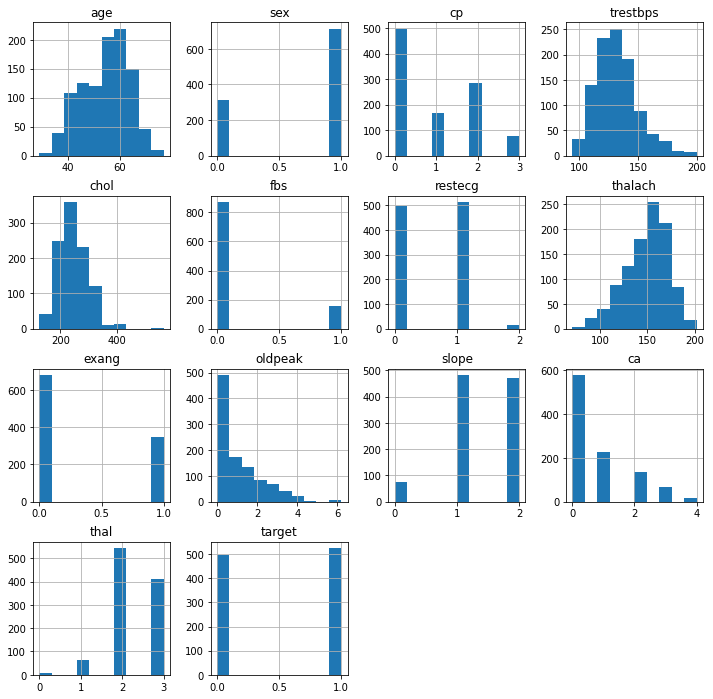

In [ ]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

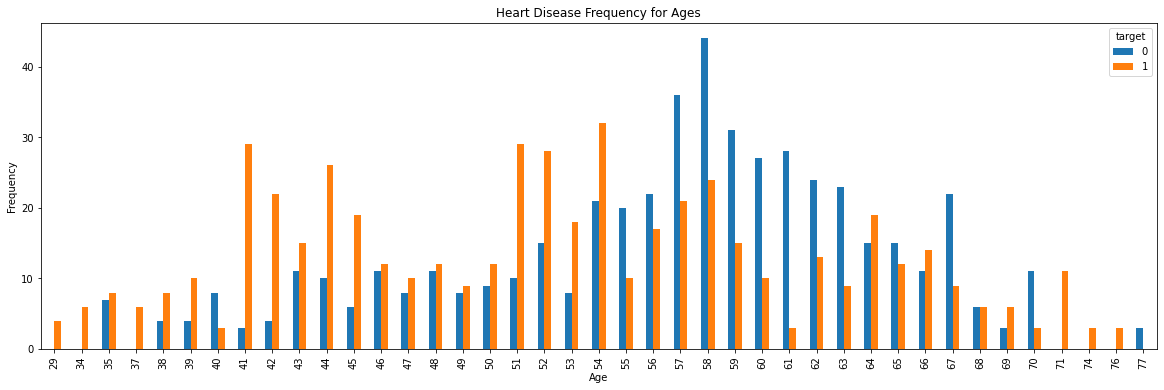

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

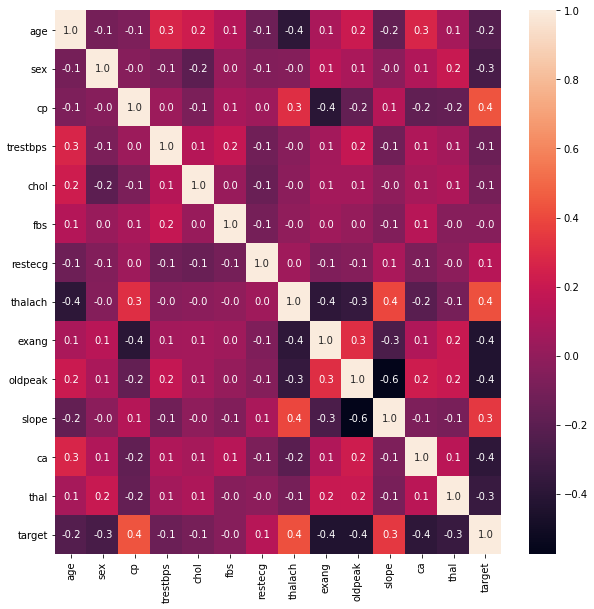

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

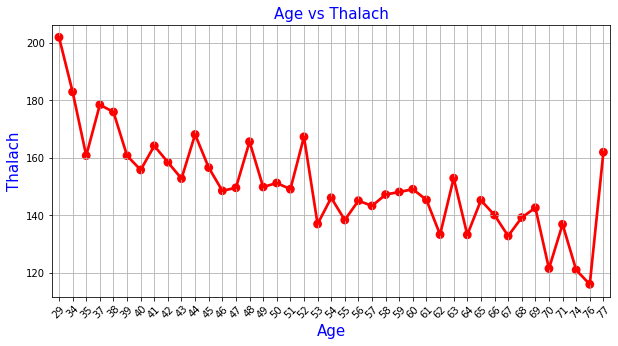

In [ ]:
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

**CREATING TRAINING AND TEST DATASETS**

In [ ]:
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])

In [ ]:
X[0]

array([ 52.,   1.,   0., 125., 212.,   0.,   1., 168.,   0.,   1.,   2.,
         2.,   3.])

In [ ]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [ ]:
X[0]

array([-0.26843658,  0.66150409, -0.91575542, -0.37763552, -0.65933209,
       -0.41887792,  0.89125488,  0.82132052, -0.71228712, -0.06088839,
        0.99543334,  1.20922066,  1.08985168])

In [ ]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [ ]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(820, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [ ]:
X_train[0]

array([ 0.834359  , -1.51170646, -0.91575542,  0.36487493,  0.93082177,
        2.38733039,  0.89125488, -1.87497657, -0.71228712,  0.70540823,
       -0.6241209 ,  2.17981673, -0.52212231])

**CREATING MODELS OR ALGORITHMS**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


2021-07-12 19:24:12.746079: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-12 19:24:12.764262: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-07-12 19:24:12.764333: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c8c3c6d97c71): /proc/driver/nvidia/version does not exist
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# fit the model to the training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)

2021-07-12 19:24:13.143686: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-12 19:24:13.144414: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2200230000 Hz


Epoch 1/50
82/82 [==============================] - 17s 11ms/step - loss: 0.6724 - accuracy: 0.6572 - val_loss: 0.5921 - val_accuracy: 0.8195
Epoch 2/50
82/82 [==============================] - 0s 2ms/step - loss: 0.5528 - accuracy: 0.8164 - val_loss: 0.4643 - val_accuracy: 0.8341
Epoch 3/50
82/82 [==============================] - 0s 3ms/step - loss: 0.4776 - accuracy: 0.8040 - val_loss: 0.3975 - val_accuracy: 0.8146
Epoch 4/50
82/82 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 0.8251 - val_loss: 0.3747 - val_accuracy: 0.8244
Epoch 5/50
82/82 [==============================] - 0s 3ms/step - loss: 0.3770 - accuracy: 0.8526 - val_loss: 0.3625 - val_accuracy: 0.8341
Epoch 6/50
82/82 [==============================] - 0s 2ms/step - loss: 0.3606 - accuracy: 0.8566 - val_loss: 0.3573 - val_accuracy: 0.8244
Epoch 7/50
82/82 [==============================] - 0s 3ms/step - loss: 0.3345 - accuracy: 0.8774 - val_loss: 0.3472 - val_accuracy: 0.8390
Epoch 8/50
82/82 [

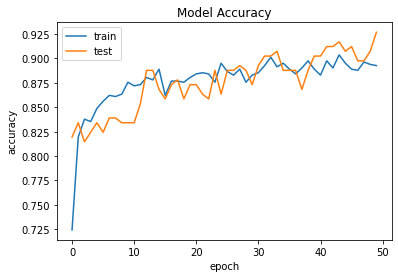

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

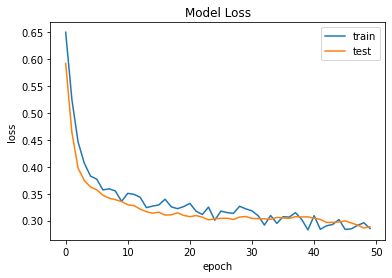

In [ ]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show() 

**DEPLOYMENT**

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

import os
import pickle

import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import auc, roc_auc_score
from xgboost import XGBClassifier

st.title("Heart Disease Prediction")
st.write("Predicting if patients are suffering from heart disease")
st.text("Please fill all fields with (*)")

st.sidebar.text("ver 1.0")

from google.colab import drive
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/KBSProject/heart.csv")



value_cols = df[['age','chol']]

cols = [ 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df = df[cols].apply(lambda col: col.astype('category'))

le = LabelEncoder()
df = df[cols].apply(le.fit_transform)
df = pd.concat([value_cols, df], axis=1)


col1, col2 = st.beta_columns(2)

with col1:
  sex = st.number_input('sex*', min_value=0.0, step=.1)
  cp = st.number_input('cp*', min_value=0.0, step=.1)
  trestbps = st.number_input('trestbps*', min_value=0.0, step=.1)
  fbs = st.number_input('fbs*', min_value=0.0, step=.1)
  restecg = st.number_input('restecg*', min_value=0.0, step=0.1)
  thalach = st.number_input('thalach*', min_value=0.0, step=.1)
  age = st.number_input('age*', min_value=0.0, step=.1)

with col2:
	chol = st.number_input('chol*', min_value=0.0, step=.1)
	exang = st.number_input('exang*', min_value=0.0, step=.1)
	oldpeak = st.number_input('oldpeak*', min_value=0.0, step=.1)
	slope = st.number_input('slope*', min_value=0.0, step=.1)
	ca = st.number_input('ca*', min_value=0.0, step=.1)
	thal = st.number_input('thal*', min_value=0.0, step=.1)
	target = st.number_input('target*', min_value=0.0, step=.1)

def build_model():
	if os.path.exists('trained_model.pkl'):
	  print("Loading Trained Model...")
	  clf = joblib.load('trained_model.pkl')
	  print("Model Loaded Successfully...")
	else:
		print("Training model....please wait...")

		df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/KBSProject/heart.csv")

		value_cols = df[['age','chol']]

		cols = ['sex', 'cp', 'trestbps',  'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

		df = df[cols].apply(lambda col: col.astype('category'))

		le = LabelEncoder()
		df = df[cols].apply(le.fit_transform)
		df = pd.concat([value_cols, df], axis=1)
		features = df[['sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']]

		X = features.iloc[:, 0:-1]
		Y = features.iloc[:,-1]

		X = np.array(X)
		Y = np.array(Y).reshape(-1,1)

		x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42) 

		clf = XGBClassifier(learning_rate=.1, n_estimators=100, max_depth=6, sampling_method='gradient_based')
		clf.fit(x_train, y_train)
		joblib.dump(clf, 'trained_model.pkl')
		print("Model trained and saved successfully...")

	return clf

def predict(sex, cp, trestbps, fbs, restecg, thalach,exang, oldpeak, slope, ca, thal):
	clf = build_model()
	pred = clf.predict([[sex, cp, trestbps, fbs, restecg, thalach,exang, oldpeak, slope, ca, thal]])
	pred = le.inverse_transform(pred)

	return pred

result = predict(sex, cp, trestbps, fbs, restecg, thalach,exang, oldpeak, slope, ca, thal)

st.write("Is Patient suffering from heart disease: " + str(result[0]))


Writing app.py


In [ ]:
!pip install pyngrok==4.1.1